In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import itertools
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL

In [2]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)


n_neighbors = range(1,40)
weights_options = ['uniform', 'distance']
HP_list = itertools.product(n_neighbors, weights_options)
results = []
for HyperParam in HP_list:
    n, weights = HyperParam
    knn_model = KNeighborsRegressor(n_neighbors=n, weights=weights)
    res = kFoldCross(knn_model.fit, knn_model.predict, X_dev, Y_dev, 5)
    res = weights, n, res[0], res[1]
    results.append(res)

df = pd.DataFrame(results, columns=['weights', 'n_neighbors', 'MEE_mean', 'MEE_std'])

,weights,n_neighbors,MEE_mean,MEE_std
29,distance,15,2.813790,0.095351
27,distance,14,2.815349,0.103661
39,distance,20,2.816418,0.138196
45,distance,23,2.817400,0.138047
19,distance,10,2.818503,0.081327
47,distance,24,2.818741,0.136615
41,distance,21,2.819721,0.134434
43,distance,22,2.820007,0.129631
35,distance,18,2.820071,0.115614
15,distance,8,2.820117,0.080831


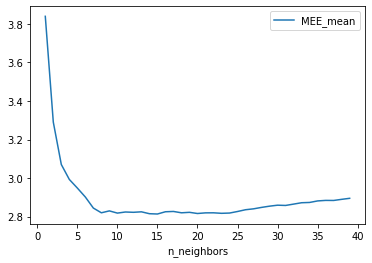

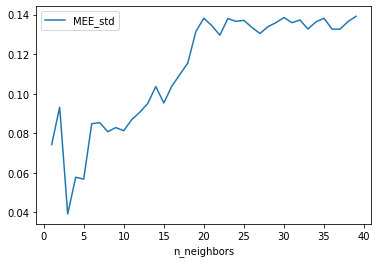

In [3]:
df_uni = df.loc[df['weights'] == 'uniform']
df_dist = df.loc[df['weights'] == 'distance']

# df_uni.plot(x='n_neighbors', y='MEE_mean')
df_dist.plot(x='n_neighbors', y='MEE_mean')
df_dist.plot(x='n_neighbors', y='MEE_std')

df.sort_values(by=['MEE_mean']).head(10)
    
